## การวิเคราะห์เชิงเส้นและพหุนามสำหรับการตั้งราคาฟักทอง - บทเรียนที่ 3

โหลดไลบรารีและชุดข้อมูลที่จำเป็น จากนั้นแปลงข้อมูลให้เป็น DataFrame ที่มีเพียงส่วนย่อยของข้อมูล:

- เลือกเฉพาะฟักทองที่ตั้งราคาเป็นหน่วย bushel
- แปลงวันที่ให้เป็นเดือน
- คำนวณราคาให้เป็นค่าเฉลี่ยระหว่างราคาสูงสุดและต่ำสุด
- แปลงราคาให้สะท้อนถึงการตั้งราคาต่อปริมาณในหน่วย bushel


In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

pumpkins = pd.read_csv('../../data/US-pumpkins.csv')
pumpkins.head()

City Name Type       Package      Variety Sub Variety  Grade     Date  \
0  BALTIMORE  NaN  24 inch bins          NaN         NaN    NaN  4/29/17   
1  BALTIMORE  NaN  24 inch bins          NaN         NaN    NaN   5/6/17   
2  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
3  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
4  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  11/5/16   

   Low Price  High Price  Mostly Low  ...  Unit of Sale Quality Condition  \
0      270.0       280.0       270.0  ...           NaN     NaN       NaN   
1      270.0       280.0       270.0  ...           NaN     NaN       NaN   
2      160.0       160.0       160.0  ...           NaN     NaN       NaN   
3      160.0       160.0       160.0  ...           NaN     NaN       NaN   
4       90.0       100.0        90.0  ...           NaN     NaN       NaN   

  Appearance Storage  Crop Repack  Trans Mode  Unnamed: 24  Unnamed: 25  
0        NaN     NaN   NaN      E         NaN          NaN          NaN  
1        NaN     NaN   NaN      E         NaN          NaN          NaN  
2        NaN     NaN   NaN      N         NaN          NaN          NaN  
3        NaN     NaN   NaN      N         NaN          NaN          NaN  
4        NaN     NaN   NaN      N         NaN          NaN          NaN  

[5 rows x 26 columns]

In [168]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

new_columns = ['Package', 'Variety', 'City Name', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month
day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)

new_pumpkins = pd.DataFrame(
    {'Month': month, 
     'DayOfYear' : day_of_year, 
     'Variety': pumpkins['Variety'], 
     'City': pumpkins['City Name'], 
     'Package': pumpkins['Package'], 
     'Low Price': pumpkins['Low Price'],
     'High Price': pumpkins['High Price'], 
     'Price': price})

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/1.1
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price*2

new_pumpkins.head()


Month  DayOfYear   Variety       City               Package  Low Price  \
70      9        267  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       15.0   
71      9        267  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       18.0   
72     10        274  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       18.0   
73     10        274  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       17.0   
74     10        281  PIE TYPE  BALTIMORE  1 1/9 bushel cartons       15.0   

    High Price      Price  
70        15.0  13.636364  
71        18.0  16.363636  
72        18.0  16.363636  
73        17.0  15.454545  
74        15.0  13.636364

แผนภาพกระจายเตือนเราว่าเรามีข้อมูลรายเดือนเฉพาะตั้งแต่เดือนสิงหาคมถึงเดือนธันวาคม เราอาจต้องการข้อมูลเพิ่มเติมเพื่อที่จะสรุปผลในรูปแบบเชิงเส้น


<AxesSubplot:xlabel='Month', ylabel='Price'>

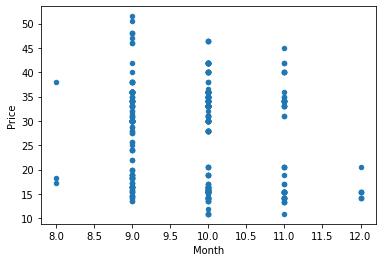

In [169]:
new_pumpkins.plot.scatter('Month','Price')

<AxesSubplot:xlabel='DayOfYear', ylabel='Price'>

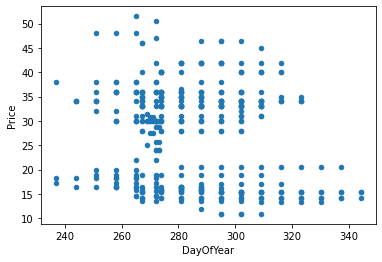

In [170]:
new_pumpkins.plot.scatter('DayOfYear','Price')

In [171]:
print(new_pumpkins['Month'].corr(new_pumpkins['Price']))
print(new_pumpkins['DayOfYear'].corr(new_pumpkins['Price']))

-0.14878293554077535
-0.16673322492745407


ดูเหมือนว่าความสัมพันธ์จะค่อนข้างน้อย แต่มีความสัมพันธ์อื่นที่สำคัญกว่า - เพราะจุดราคาบนกราฟด้านบนดูเหมือนจะมีการจัดกลุ่มที่แตกต่างกันหลายกลุ่ม ลองสร้างกราฟที่แสดงพันธุ์ฟักทองที่แตกต่างกัน:


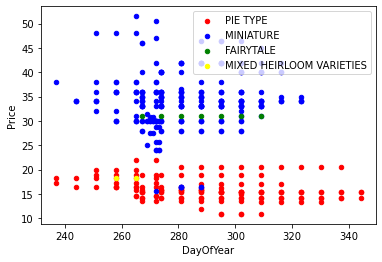

In [172]:
ax=None
colors = ['red','blue','green','yellow']
for i,var in enumerate(new_pumpkins['Variety'].unique()):
    ax = new_pumpkins[new_pumpkins['Variety']==var].plot.scatter('DayOfYear','Price',ax=ax,c=colors[i],label=var)

<AxesSubplot:xlabel='Variety'>

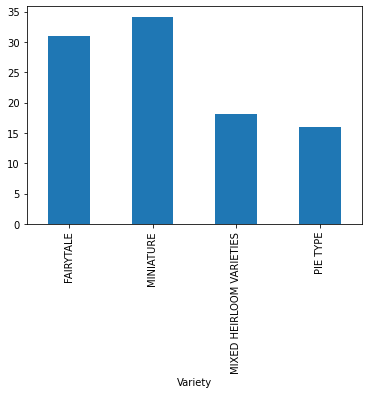

In [173]:
new_pumpkins.groupby('Variety')['Price'].mean().plot(kind='bar')

-0.2669192282197318


<AxesSubplot:xlabel='DayOfYear', ylabel='Price'>

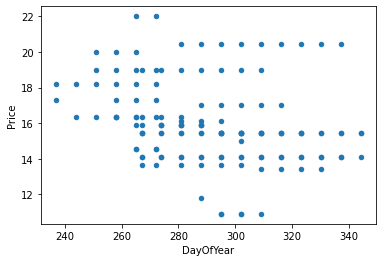

In [174]:
pie_pumpkins = new_pumpkins[new_pumpkins['Variety']=='PIE TYPE']
print(pie_pumpkins['DayOfYear'].corr(pie_pumpkins['Price']))
pie_pumpkins.plot.scatter('DayOfYear','Price')

### การถดถอยเชิงเส้น

เราจะใช้ Scikit Learn เพื่อฝึกโมเดลการถดถอยเชิงเส้น:


In [175]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [176]:
X = pie_pumpkins['DayOfYear'].to_numpy().reshape(-1,1)
y = pie_pumpkins['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

pred = lin_reg.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')


Mean error: 2.77 (17.2%)


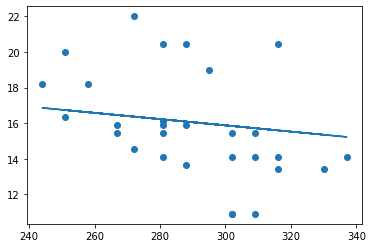

In [177]:
plt.scatter(X_test,y_test)
plt.plot(X_test,pred)

In [178]:
lin_reg.coef_, lin_reg.intercept_

(array([-0.01751876]), 21.133734359909326)

In [179]:
# Pumpkin price on programmer's day

lin_reg.predict([[256]])

array([16.64893156])

### การถดถอยเชิงพหุนาม

บางครั้งความสัมพันธ์ระหว่างคุณลักษณะและผลลัพธ์อาจไม่เป็นเชิงเส้นโดยธรรมชาติ ตัวอย่างเช่น ราคาฟักทองอาจสูงในฤดูหนาว (เดือน 1, 2) จากนั้นลดลงในฤดูร้อน (เดือน 5-7) และกลับมาสูงขึ้นอีกครั้ง การถดถอยเชิงเส้นไม่สามารถจับความสัมพันธ์นี้ได้อย่างแม่นยำ

ในกรณีนี้ เราอาจพิจารณาเพิ่มคุณลักษณะเพิ่มเติม วิธีง่ายๆ คือการใช้พหุนามจากคุณลักษณะอินพุต ซึ่งจะนำไปสู่ **การถดถอยเชิงพหุนาม** ใน Scikit Learn เราสามารถคำนวณคุณลักษณะพหุนามล่วงหน้าโดยอัตโนมัติด้วยการใช้ pipelines:


Mean error: 2.73 (17.0%)
Model determination:  0.07639977655280217


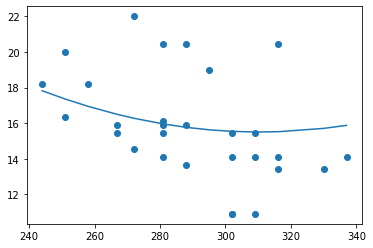

In [180]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

pipeline.fit(X_train,y_train)

pred = pipeline.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

plt.scatter(X_test,y_test)
plt.plot(sorted(X_test),pipeline.predict(sorted(X_test)))

### การเข้ารหัสชนิดต่าง ๆ

ในโลกที่สมบูรณ์แบบ เราต้องการที่จะสามารถทำนายราคาของฟักทองชนิดต่าง ๆ โดยใช้โมเดลเดียวกัน เพื่อที่จะนำชนิดของฟักทองมาพิจารณา เราจำเป็นต้องแปลงมันให้อยู่ในรูปแบบตัวเลข หรือที่เรียกว่า **การเข้ารหัส** มีหลายวิธีที่เราสามารถทำได้:

* การเข้ารหัสตัวเลขแบบง่าย ซึ่งจะสร้างตารางของชนิดฟักทองต่าง ๆ แล้วแทนชื่อชนิดด้วยดัชนีในตารางนั้น วิธีนี้ไม่ใช่ตัวเลือกที่ดีที่สุดสำหรับการวิเคราะห์ถดถอยเชิงเส้น (linear regression) เพราะการวิเคราะห์ถดถอยเชิงเส้นจะนำค่าตัวเลขของดัชนีมาพิจารณา และค่าตัวเลขนั้นอาจไม่มีความสัมพันธ์เชิงตัวเลขกับราคา
* การเข้ารหัสแบบ One-hot ซึ่งจะเปลี่ยนคอลัมน์ `Variety` ให้เป็น 4 คอลัมน์ที่แตกต่างกัน โดยแต่ละคอลัมน์จะเป็นตัวแทนของชนิดฟักทองแต่ละชนิด และจะมีค่าเป็น 1 หากแถวที่เกี่ยวข้องเป็นชนิดนั้น และมีค่าเป็น 0 หากไม่ใช่

โค้ดด้านล่างแสดงวิธีที่เราสามารถเข้ารหัสชนิดฟักทองแบบ One-hot:


In [181]:
pd.get_dummies(new_pumpkins['Variety'])

FAIRYTALE  MINIATURE  MIXED HEIRLOOM VARIETIES  PIE TYPE
70            0          0                         0         1
71            0          0                         0         1
72            0          0                         0         1
73            0          0                         0         1
74            0          0                         0         1
...         ...        ...                       ...       ...
1738          0          1                         0         0
1739          0          1                         0         0
1740          0          1                         0         0
1741          0          1                         0         0
1742          0          1                         0         0

[415 rows x 4 columns]

### การถดถอยเชิงเส้นบนชนิดพันธุ์

ตอนนี้เราจะใช้โค้ดเดิมเหมือนข้างต้น แต่แทนที่จะใช้ `DayOfYear` เราจะใช้ชนิดพันธุ์ที่ผ่านการเข้ารหัสแบบ one-hot เป็นข้อมูลนำเข้า:


In [182]:
X = pd.get_dummies(new_pumpkins['Variety'])
y = new_pumpkins['Price']

In [183]:
def run_linear_regression(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train,y_train)

    pred = lin_reg.predict(X_test)

    mse = np.sqrt(mean_squared_error(y_test,pred))
    print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

    score = lin_reg.score(X_train,y_train)
    print('Model determination: ', score)

run_linear_regression(X,y)

Mean error: 5.24 (19.7%)
Model determination:  0.774085281105197


เรายังสามารถลองใช้คุณสมบัติอื่นในลักษณะเดียวกัน และรวมเข้ากับคุณสมบัติทางตัวเลข เช่น `Month` หรือ `DayOfYear`:


In [184]:
X = pd.get_dummies(new_pumpkins['Variety']) \
        .join(new_pumpkins['Month']) \
        .join(pd.get_dummies(new_pumpkins['City'])) \
        .join(pd.get_dummies(new_pumpkins['Package']))
y = new_pumpkins['Price']

run_linear_regression(X,y)

Mean error: 2.84 (10.5%)
Model determination:  0.9401096672643048


### การถดถอยเชิงพหุนาม

การถดถอยเชิงพหุนามสามารถนำมาใช้กับคุณลักษณะเชิงหมวดหมู่ที่ผ่านการเข้ารหัสแบบ one-hot ได้เช่นกัน โค้ดสำหรับการฝึกการถดถอยเชิงพหุนามจะมีลักษณะเหมือนกับที่เราได้เห็นไปก่อนหน้านี้


In [185]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pipeline.fit(X_train,y_train)

pred = pipeline.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

Mean error: 2.23 (8.25%)
Model determination:  0.9652870784724543



---

**ข้อจำกัดความรับผิดชอบ**:  
เอกสารนี้ได้รับการแปลโดยใช้บริการแปลภาษา AI [Co-op Translator](https://github.com/Azure/co-op-translator) แม้ว่าเราจะพยายามให้การแปลมีความถูกต้อง แต่โปรดทราบว่าการแปลอัตโนมัติอาจมีข้อผิดพลาดหรือความไม่แม่นยำ เอกสารต้นฉบับในภาษาต้นทางควรถือเป็นแหล่งข้อมูลที่เชื่อถือได้ สำหรับข้อมูลที่สำคัญ ขอแนะนำให้ใช้บริการแปลภาษาจากผู้เชี่ยวชาญ เราจะไม่รับผิดชอบต่อความเข้าใจผิดหรือการตีความที่ผิดพลาดซึ่งเกิดจากการใช้การแปลนี้
